In [1]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg

sys.path.append('/home/galm/software/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1366

In [2]:
k_cores = Doc.objects.filter(query=qid,k__isnull=False,cdo__citation__isnull=False).values('k').annotate(
    count = Count('pk')
)
k_cores = pd.DataFrame.from_dict(list(k_cores)).sort_values('k')

degrees = Doc.objects.filter(query=qid,k__isnull=False,cdo__citation__isnull=False).values('degree').annotate(
    count = Count('pk')
)
degrees = pd.DataFrame.from_dict(list(degrees)).sort_values('degree')

print(k_cores.head())

     count  k
117  63621  0
263  47479  1
176  46764  2
388  37557  3
810  35360  4


In [3]:
long_k = Doc.objects.filter(query=qid).values('k')

long_k = pd.DataFrame.from_dict(list(long_k))

long_data = Doc.objects.filter(query=qid).values('k','degree','eigen_cent')

long_data = pd.DataFrame.from_dict(list(long_data))

print(long_data.head())

     degree  eigen_cent       k
0  0.008239    0.000703   658.0
1  0.000604    0.000065    87.0
2  0.001175    0.000094   149.0
3  0.009998    0.000673  1103.0
4  0.001983    0.000036   195.0


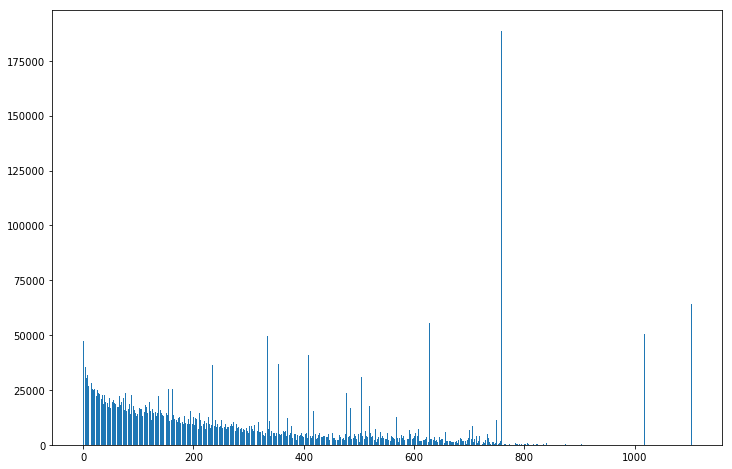

In [4]:
plt.rcParams["figure.figsize"] = [12,8]

plt.bar(k_cores['k'].values,k_cores['count'].values)

plt.show()

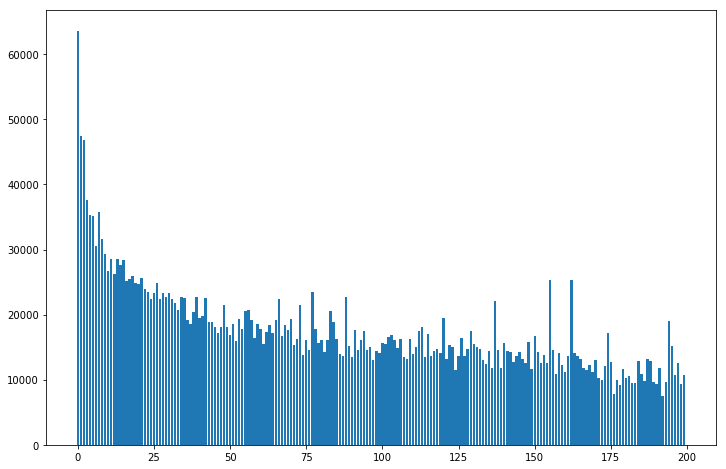

In [5]:
sub_k = k_cores[k_cores['k'] < 200]

plt.bar( sub_k['k'].values, sub_k['count'].values )

plt.show()

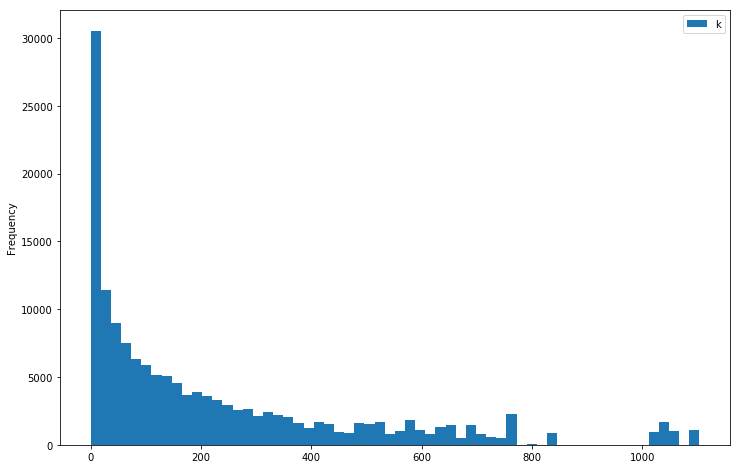

In [6]:
long_k.plot.hist(bins=60)

plt.show()

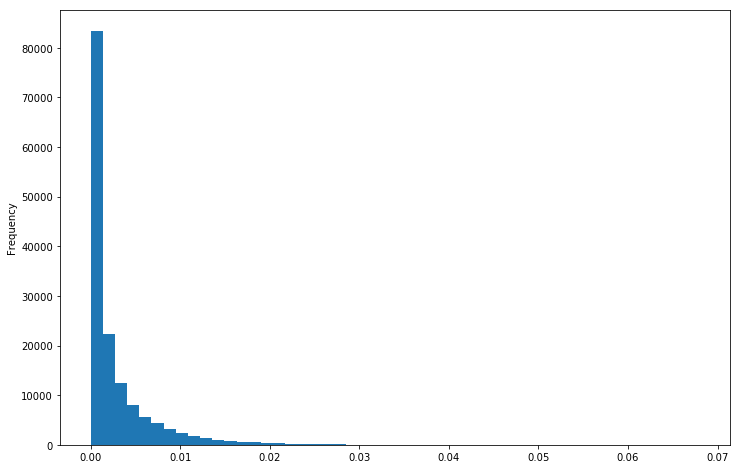

In [7]:
long_data['degree'].plot.hist(bins=50)

plt.show()

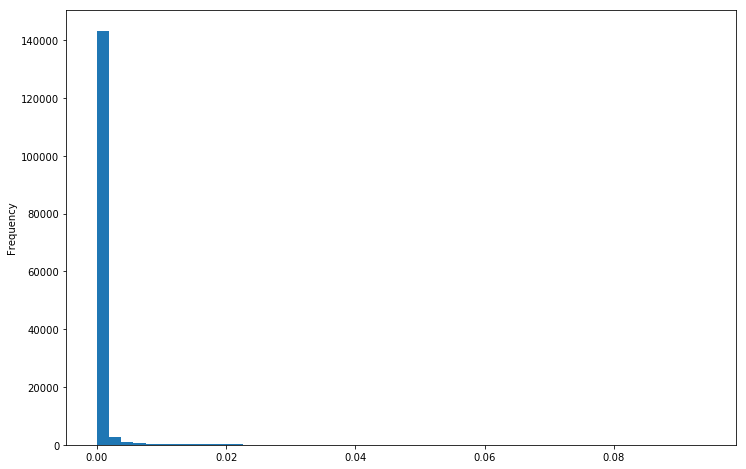

In [8]:
long_data['eigen_cent'].plot.hist(bins=50)

plt.show()

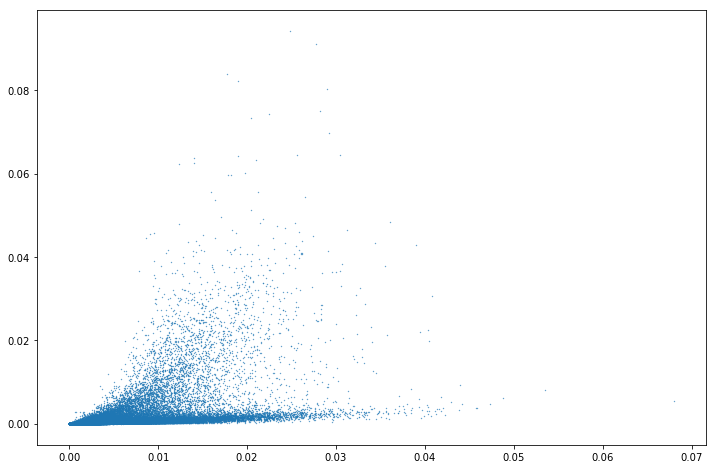

In [9]:
plt.scatter(long_data['degree'],long_data['eigen_cent'],s=0.1)
plt.show()

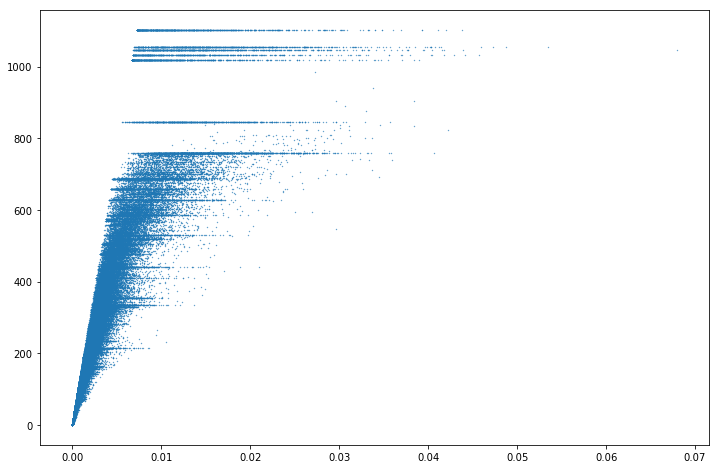

In [10]:
plt.scatter(long_data['degree'],long_data['k'],s=0.1)
plt.show()

In [23]:
dts = DocTopic.objects.filter(
    run_id=191,
    doc__query=qid,
    doc__k__isnull=False,
    doc__citation_objects=True,
    score__gt=0.01
).values('topic__title')

dts = dts.annotate(
    k = models.Avg('doc__k'),
    degree = models.Avg('doc__degree'),
    eigen_cent = models.Avg('doc__eigen_cent'),
    distance = models.Avg('doc__distance')
)
df =  pd.DataFrame.from_dict(list(dts))

In [24]:
df.head()

,degree,distance,eigen_cent,k,topic__title
0,0.001691,3.733026,0.000012,153.829222,"{acid, fatti, amino}"
1,0.006021,3.153377,0.000765,409.731500,"{adapt, climat, mitig}"
2,0.002395,3.350925,0.000201,213.076049,"{africa, south, african}"
3,0.003174,3.409753,0.000328,248.016159,"{aggreg, concret, coars}"
4,0.003991,3.217192,0.000204,301.617188,"{agricultur, intensif, input}"


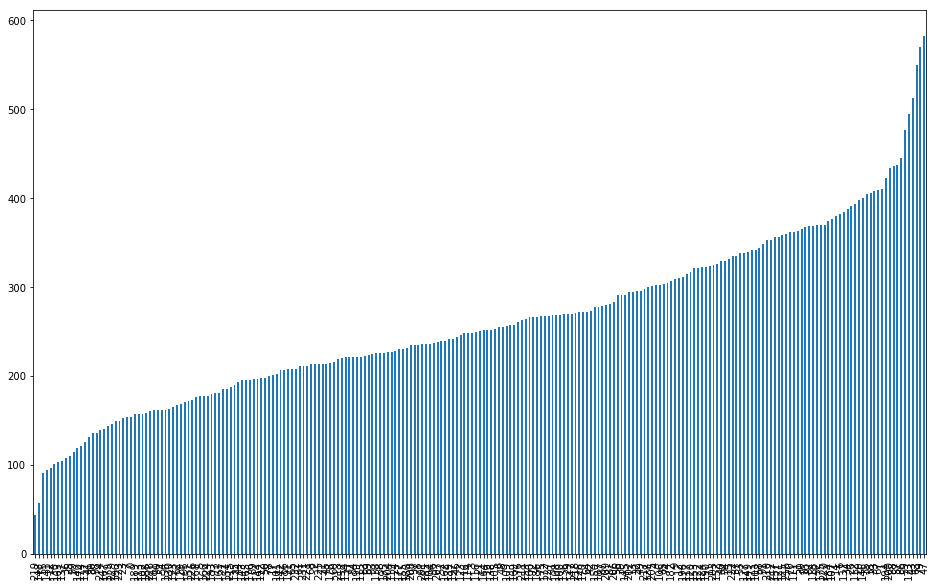

In [28]:
pdf = df.sort_values('k')

plt.rcParams["figure.figsize"] = [16,10]
pdf['k'].plot.bar()
plt.show()

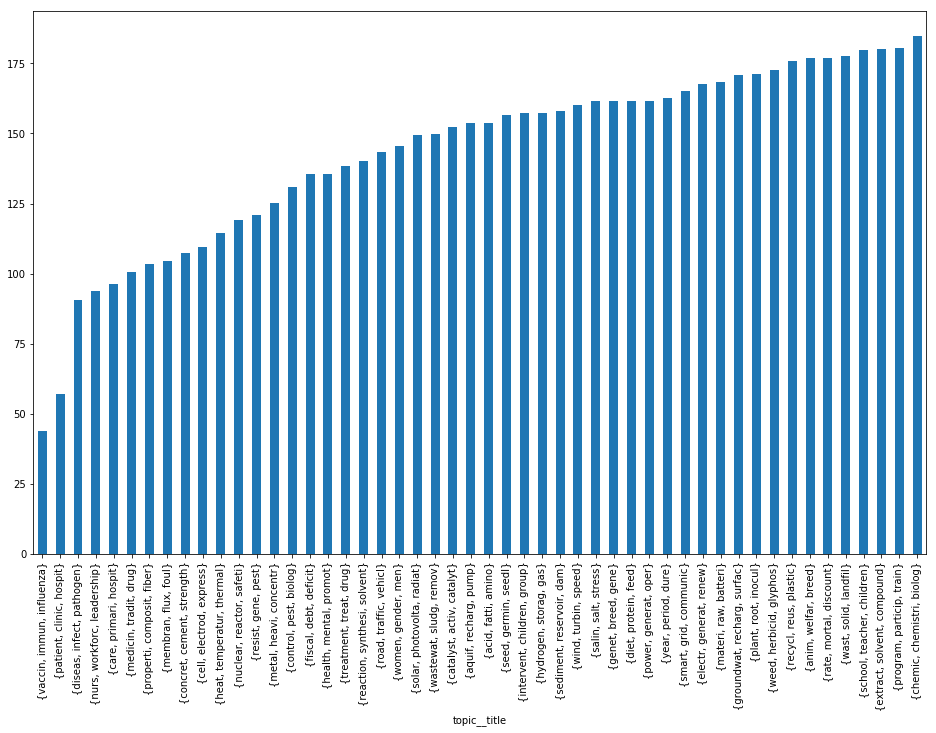

In [29]:
pdf = df.sort_values('k')

pdf = pdf.head(50)
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf['k'].plot.bar()
plt.show()

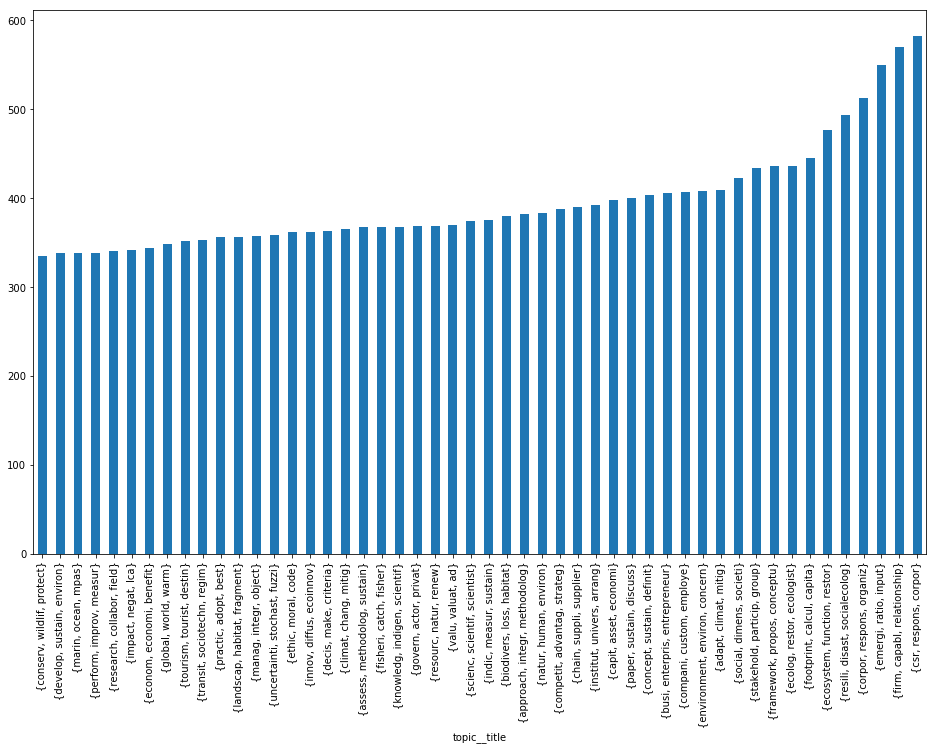

In [30]:
pdf = df.sort_values('k')

pdf = pdf.tail(50)
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf['k'].plot.bar()
plt.show()

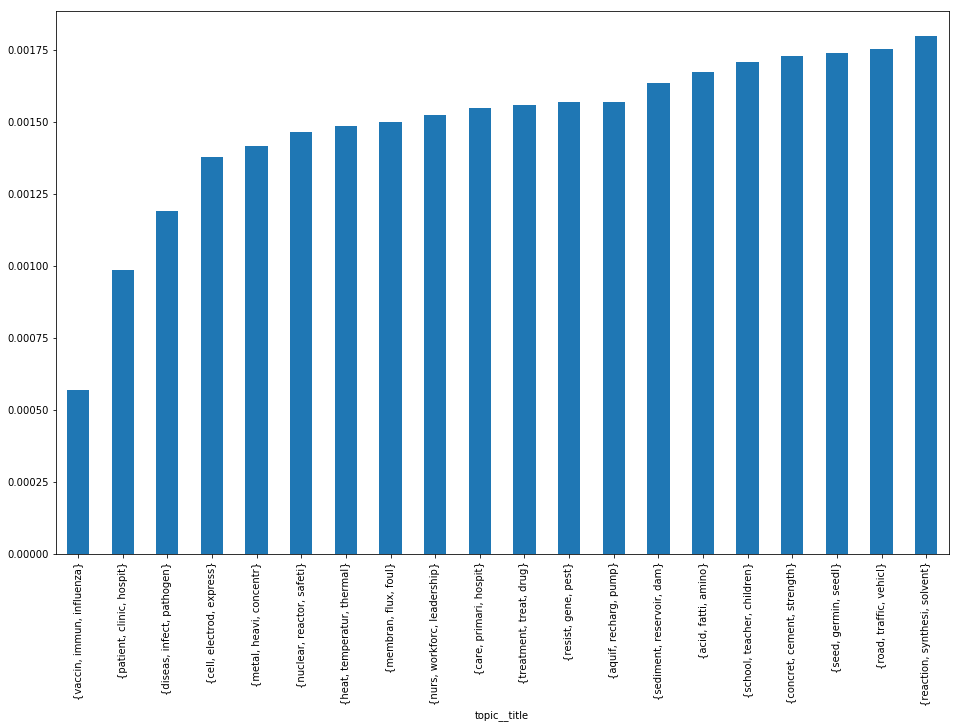

In [16]:
pdf = df.sort_values('degree')

pdf = pdf.head(20)
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf['degree'].plot.bar()
plt.show()

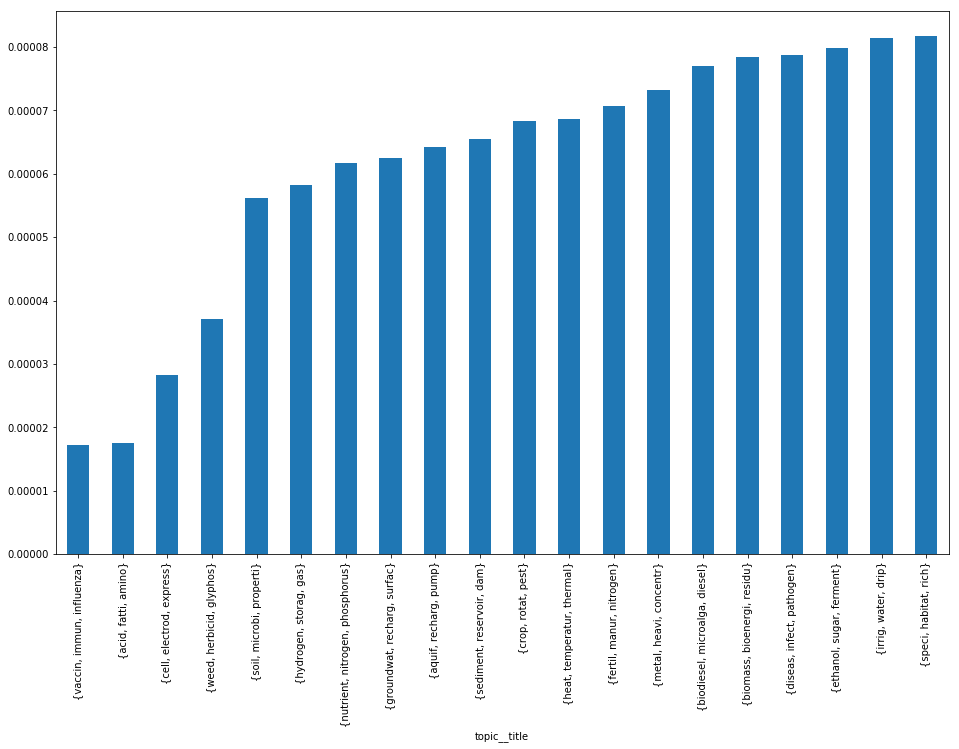

In [17]:
pdf = df.sort_values('eigen_cent')

pdf = pdf.head(20)
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf['eigen_cent'].plot.bar()
plt.show()

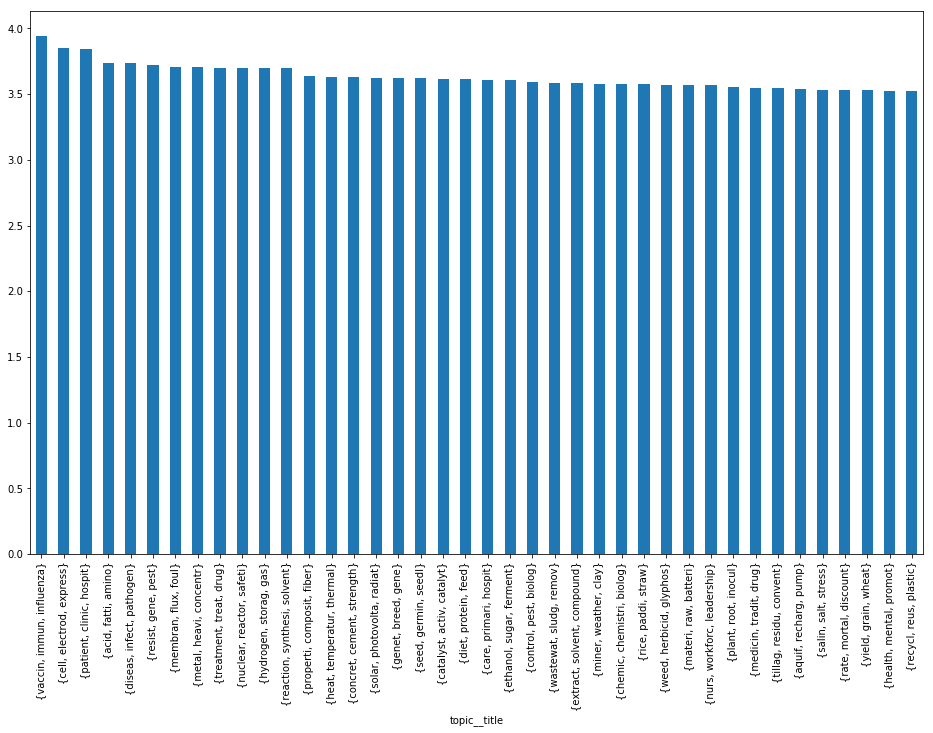

In [22]:
pdf = df.sort_values('distance',ascending=False)

pdf = pdf.head(40)
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf['distance'].plot.bar()
plt.show()

In [ ]:
 dts = DocTopic.objects.filter(
     run_id=191,doc__query=qid,
     doc__k__isnull=False,
     doc__citation_objects=True,
     doc__distance__isnull=True
 ).values('topic__title')
    
dts = dts.annotate(
    n = Count(doc__pk)
)
df =  pd.DataFrame.from_dict(list(dts))
